###  準確度變低

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import KFold
from sklearn import metrics

In [4]:
csv_data = pd.read_csv('database_1_0_hg.csv')
csv_data = csv_data.drop('Unnamed: 0',axis = 1)   #消除第0行
csv_data

,HG_mostNum,HG_std,HG_val,HG_entropy,GLCM_asm,GLCM_contrast,GLCM_entropt,GLCM_idm,label
0,0.027344,0.016478,0.658659,3.568960,1.000000,0.000000,0.000000,1.000000,0
1,0.027344,0.015779,0.664035,3.490376,1.000000,0.000000,0.000000,1.000000,0
2,0.093750,0.048163,0.734958,5.047266,1.000000,0.000000,0.000000,1.000000,0
3,0.039062,0.042402,0.676083,4.867942,1.000000,0.000000,0.000000,1.000000,0
4,0.042969,0.034492,0.640324,4.548501,1.000000,0.000000,0.000000,1.000000,0
5,0.039062,0.040527,0.669042,4.671535,1.000000,0.000000,0.000000,1.000000,0
6,0.042969,0.072888,0.725560,5.227786,1.000000,0.000000,0.000000,1.000000,0
7,0.027344,0.017266,0.720220,3.611113,1.000000,0.000000,0.000000,1.000000,0
8,0.023438,0.021164,0.758399,3.899330,1.000000,0.000000,0.000000,1.000000,0
9,0.023438,0.017317,0.732694,3.631464,1.000000,0.000000,0.000000,1.000000,0


In [5]:
display(csv_data.describe())      #使用describe()函數查看每一列的描述性統計量

,HG_mostNum,HG_std,HG_val,HG_entropy,GLCM_asm,GLCM_contrast,GLCM_entropt,GLCM_idm,label
count,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000
mean,0.346949,0.084029,0.398281,5.116770,0.719577,0.070056,0.559147,0.965003,0.674057
std,0.244463,0.067849,0.402660,0.965350,0.251420,0.072683,0.484133,0.036301,0.695438
min,0.000000,0.008443,0.016316,1.996114,0.173564,0.000000,0.000000,0.811594,0.000000
25%,0.046875,0.027971,0.100237,4.303568,0.478168,0.000000,0.000000,0.943841,0.000000
50%,0.437500,0.064792,0.200626,5.212415,0.750158,0.048913,0.548345,0.975543,1.000000
75%,0.535156,0.114219,0.608145,5.844652,1.000000,0.112319,0.958206,1.000000,1.000000
max,0.753906,0.394520,1.979039,7.211319,1.000000,0.376812,1.852443,1.000000,2.000000


### 判斷是否有data leagage

In [6]:
#直方圖眾數不可能

HG_std_success = csv_data.HG_std[csv_data.label==0]
HG_std_unsuccess = csv_data.HG_std[csv_data.label==1]
HG_std_back = csv_data.HG_std[csv_data.label==2]

print("對於HG標準差而言")
print('HG_std_success: %.2f' \
      %((HG_std_success <= 7.0).mean()))
print('HG_std_unsuccess: %.2f' \
      %((HG_std_unsuccess <= 7.0).mean()))
print('HG_std_back: %.2f' \
      %((HG_std_back <= 7.0).mean()))
print()
print('HG_std_success: %.2f' \
      %((HG_std_success >= 27.0).mean()))
print('HG_std_unsuccess: %.2f' \
      %((HG_std_unsuccess >= 27.0).mean()))
print('HG_std_back: %.2f' \
      %((HG_std_back >= 27.0).mean()))

print("雖然對於背景狀態來說 值很明顯是偏小的那端 但沒有很極端故不算是")

對於HG標準差而言
HG_std_success: 1.00
HG_std_unsuccess: 1.00
HG_std_back: 1.00

HG_std_success: 0.00
HG_std_unsuccess: 0.00
HG_std_back: 0.00
雖然對於背景狀態來說 值很明顯是偏小的那端 但沒有很極端故不算是


In [19]:
HG_val_success = csv_data.HG_val[csv_data.label==0]
HG_val_unsuccess = csv_data.HG_val[csv_data.label==1]
HG_val_back = csv_data.HG_val[csv_data.label==2]

print("對於HG變異數而言")
print('HG_val_success: %.2f' \
      %((HG_val_success <= 0.09).mean()))
print('HG_val_unsuccess: %.2f' \
      %((HG_val_unsuccess <= 0.09).mean()))
print('HG_val_back: %.2f' \
      %((HG_val_back <= 0.09).mean()))
print()
print('HG_val_success: %.2f' \
      %((HG_val_success >= 0.55).mean()))
print('HG_val_unsuccess: %.2f' \
      %((HG_val_unsuccess >= 0.55).mean()))
print('HG_val_back: %.2f' \
      %((HG_val_back >= 0.55).mean()))
print("雖然對於背景狀態來說 值很明顯是偏小的那端!!!")

對於HG變異數而言
HG_val_success: 0.15
HG_val_unsuccess: 0.05
HG_val_back: 0.94

HG_val_success: 0.26
HG_val_unsuccess: 0.36
HG_val_back: 0.00
雖然對於背景狀態來說 值很明顯是偏小的那端!!!


In [20]:
HG_entropy_success = csv_data.HG_entropy[csv_data.label==0]
HG_entropy_unsuccess = csv_data.HG_entropy[csv_data.label==1]
HG_entropy_back = csv_data.HG_entropy[csv_data.label==2]


print("對於HG_entropy而言")
print('HG_entropy_success: %.2f' \
      %((HG_entropy_success <= 4.0).mean()))
print('HG_entropy_unsuccess: %.2f' \
      %((HG_entropy_unsuccess <= 4.0).mean()))
print('HG_entropy_back: %.2f' \
      %((HG_entropy_back <= 4.0).mean()))
print()
print('HG_entropy_success: %.2f' \
      %((HG_entropy_success >= 6.0).mean()))
print('HG_entropy_unsuccess: %.2f' \
      %((HG_entropy_unsuccess >= 6.0).mean()))
print('HG_entropy_back: %.2f' \
      %((HG_entropy_back >= 6.0).mean()))
print("正常")

對於HG_entropy而言
HG_entropy_success: 0.29
HG_entropy_unsuccess: 0.00
HG_entropy_back: 0.15

HG_entropy_success: 0.09
HG_entropy_unsuccess: 0.37
HG_entropy_back: 0.00
正常


In [21]:
GLCM_entropt_success = csv_data.GLCM_entropt[csv_data.label==0]
GLCM_entropt_unsuccess = csv_data.GLCM_entropt[csv_data.label==1]
GLCM_entropt_back = csv_data.GLCM_entropt[csv_data.label==2]

print("對於GLCM 熵而言")
print('GLCM_entropt_success: %.2f' \
      %((GLCM_entropt_success == 0).mean()))
print('GLCM_entroptt_unsuccess: %.2f' \
      %((GLCM_entropt_unsuccess == 0).mean()))
print('GLCM_entropt_back: %.2f' \
      %((GLCM_entropt_back == 0).mean()))
print()
print('GLCM_entropt_success: %.2f' \
      %((GLCM_entropt_success >= 1.0).mean()))
print('GLCM_entroptt_unsuccess: %.2f' \
      %((GLCM_entropt_unsuccess >= 1.0).mean()))
print('GLCM_entropt_back: %.2f' \
      %((GLCM_entropt_back >= 1.0).mean()))
print("正常")

對於GLCM 熵而言
GLCM_entropt_success: 0.43
GLCM_entroptt_unsuccess: 0.02
GLCM_entropt_back: 0.37

GLCM_entropt_success: 0.11
GLCM_entroptt_unsuccess: 0.38
GLCM_entropt_back: 0.10
正常


In [22]:
GLCM_asm_success = csv_data.GLCM_asm[csv_data.label==0]
GLCM_asm_unsuccess = csv_data.GLCM_asm[csv_data.label==1]
GLCM_asm_back = csv_data.GLCM_asm[csv_data.label==2]

print("對於GLCM asm而言")
print('GLCM_entropt_success: %.2f' \
      %((GLCM_asm_success <= 0.5).mean()))
print('GLCM_entroptt_unsuccess: %.2f' \
      %((GLCM_asm_unsuccess <= 0.5).mean()))
print('GLCM_entropt_back: %.2f' \
      %((GLCM_asm_back <= 0.5).mean()))
print()
print('GLCM_entropt_success: %.2f' \
      %((GLCM_asm_success == 1).mean()))
print('GLCM_entroptt_unsuccess: %.2f' \
      %((GLCM_asm_unsuccess == 1).mean()))
print('GLCM_entropt_back: %.2f' \
      %((GLCM_asm_back == 1).mean()))
print("正常")

對於GLCM asm而言
GLCM_entropt_success: 0.19
GLCM_entroptt_unsuccess: 0.43
GLCM_entropt_back: 0.11

GLCM_entropt_success: 0.43
GLCM_entroptt_unsuccess: 0.02
GLCM_entropt_back: 0.37
正常


In [23]:
GLCM_contrast_success = csv_data.GLCM_contrast[csv_data.label==0]
GLCM_contrast_unsuccess = csv_data.GLCM_contrast[csv_data.label==1]
GLCM_contrast_back = csv_data.GLCM_contrast[csv_data.label==2]

print("對於GLCM contrast而言")
print('GLCM_contrast_success: %.2f' \
      %((GLCM_contrast_success == 0).mean()))
print('GLCM_contrast_unsuccess: %.2f' \
      %((GLCM_contrast_unsuccess == 0).mean()))
print('GLCM_contrast_back: %.2f' \
      %((GLCM_contrast_back == 0).mean()))
print()
print("對於GLCM contrast而言")
print('GLCM_contrast_success: %.2f' \
      %((GLCM_contrast_success >= 0.1).mean()))
print('GLCM_contrast_unsuccess: %.2f' \
      %((GLCM_contrast_unsuccess >= 0.1).mean()))
print('GLCM_contrast_back: %.2f' \
      %((GLCM_contrast_back >= 0.1).mean()))
print("正常")

對於GLCM contrast而言
GLCM_contrast_success: 0.43
GLCM_contrast_unsuccess: 0.02
GLCM_contrast_back: 0.37

對於GLCM contrast而言
GLCM_contrast_success: 0.13
GLCM_contrast_unsuccess: 0.50
GLCM_contrast_back: 0.22
正常


In [24]:
GLCM_idm_success = csv_data.GLCM_idm[csv_data.label==0]
GLCM_idm_unsuccess = csv_data.GLCM_idm[csv_data.label==1]
GLCM_idm_back = csv_data.GLCM_idm[csv_data.label==2]

print("對於GLCM idm而言")
print('GLCM_contrast_success: %.2f' \
      %((GLCM_idm_success <= 0.94).mean()))
print('GLCM_contrast_unsuccess: %.2f' \
      %((GLCM_idm_unsuccess <= 0.94).mean()))
print('GLCM_contrast_back: %.2f' \
      %((GLCM_idm_back <= 0.94).mean()))
print()
print('GLCM_contrast_success: %.2f' \
      %((GLCM_idm_success == 1).mean()))
print('GLCM_contrast_unsuccess: %.2f' \
      %((GLCM_idm_unsuccess == 1).mean()))
print('GLCM_contrast_back: %.2f' \
      %((GLCM_idm_back == 1).mean()))
print("正常")

對於GLCM idm而言
GLCM_contrast_success: 0.09
GLCM_contrast_unsuccess: 0.39
GLCM_contrast_back: 0.20

GLCM_contrast_success: 0.43
GLCM_contrast_unsuccess: 0.02
GLCM_contrast_back: 0.37
正常


C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


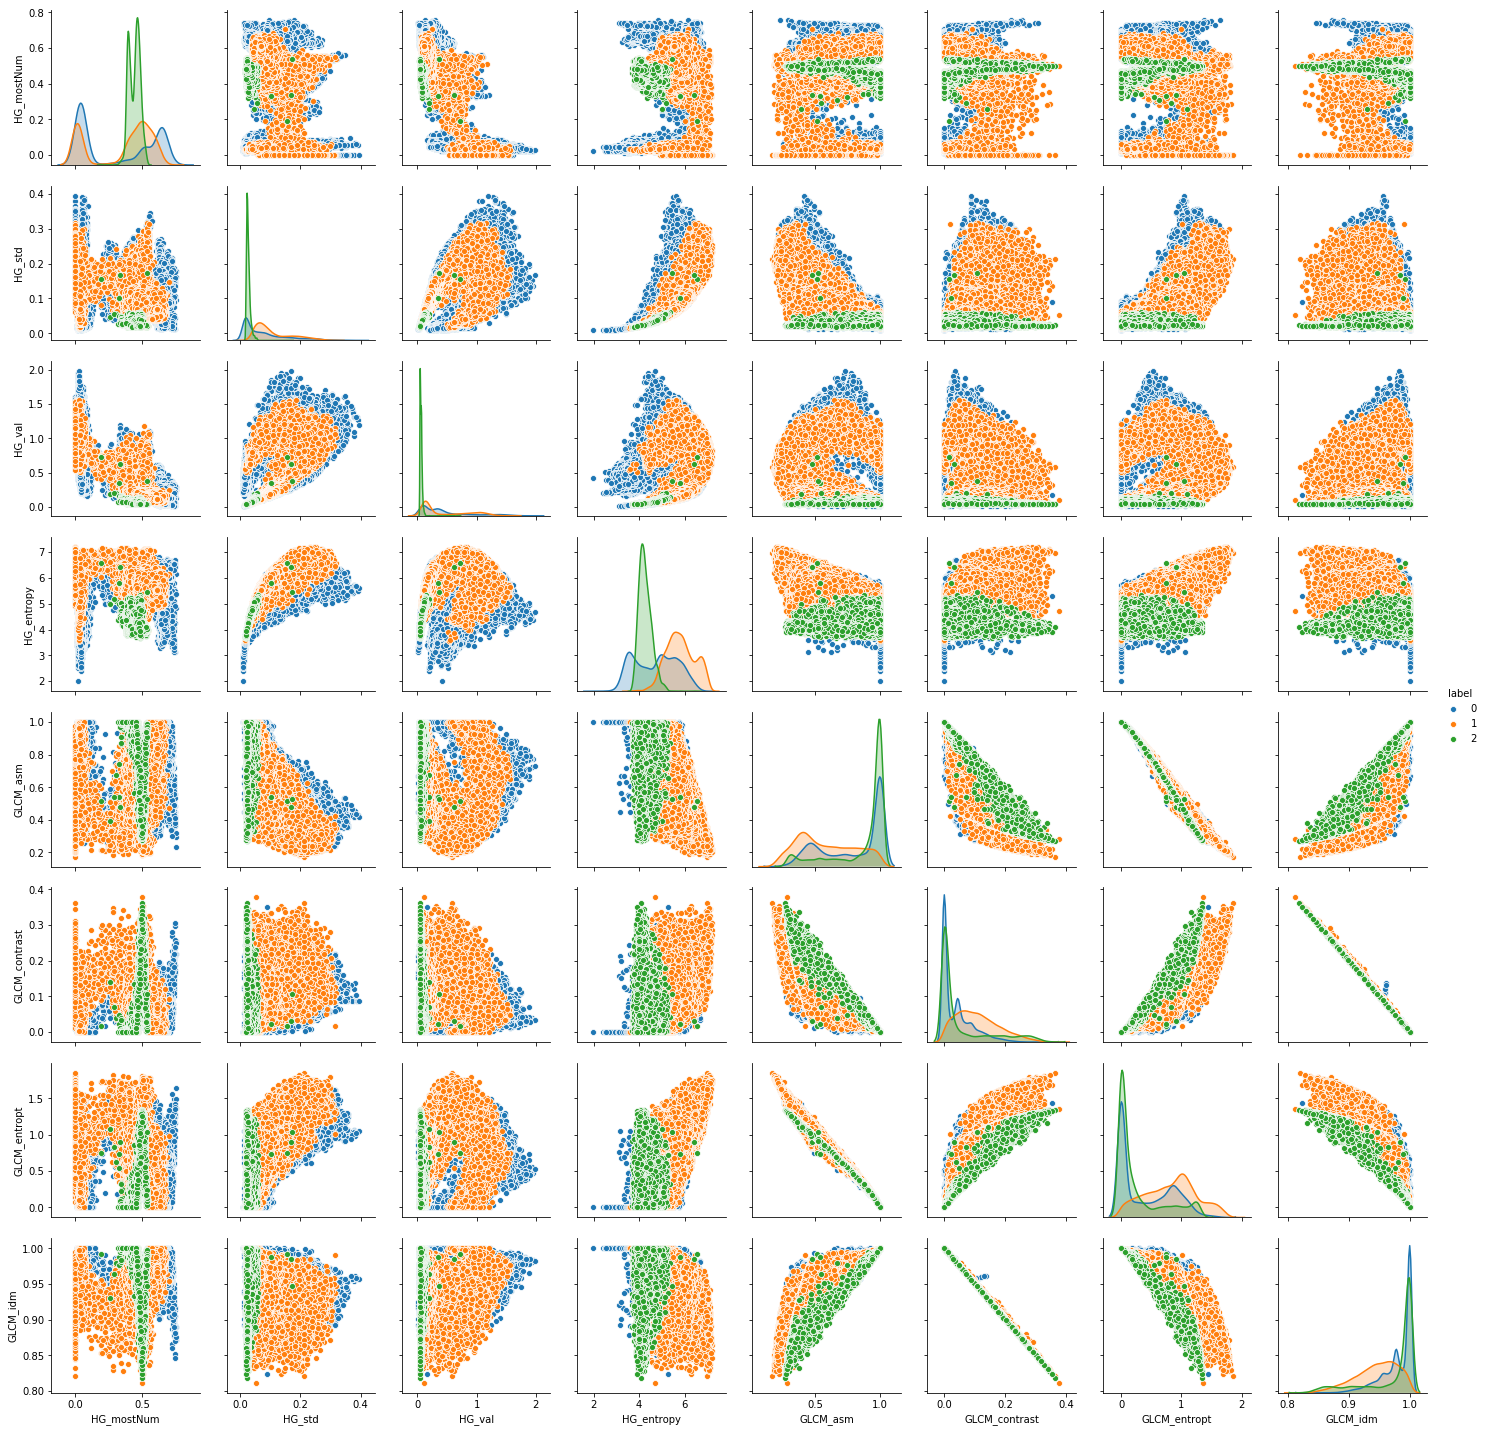

In [14]:
show_features = ["HG_mostNum", "HG_std", "HG_val", "HG_entropy","GLCM_asm","GLCM_contrast","GLCM_entropt","GLCM_idm"]
sns.pairplot(data=csv_data, hue="label", x_vars=show_features, y_vars=show_features)

### 將資料分割為訓練用以及測試用

In [7]:
from sklearn.model_selection import train_test_split
'''
#數據打亂
from sklearn.utils import shuffle
csv_data = shuffle(csv_data)
print(csv_data)
'''
Features = csv_data.drop('label',axis=1)             
Label = csv_data['label']
X_train, X_test, y_train, y_test = train_test_split(Features, Label, test_size=0.1, random_state=0) #分割1成測試就好
#將序列重排
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)


### 資料前處理函式

In [8]:
#適用for迴圈
import sklearn.preprocessing 
#不做normalization  其經由實驗證明無法增加準確度再加上對驗證以及新資料不好做正規劃
def train_preprocess(X):
    # imputation
    pass
    
    return X

#for testing data
def test_preprocess(X):
     # imputation
    pass
    
    return X

### Training and testing

In [27]:
# cross_val_score作法保留  不知道為何準確度會相較於for迴圈那麼低
'''
#pipeline 的數據處理要用scuikit learn的函式做
Features2 = csv_data.drop('label',axis=1)  
Features2 = Features2.drop('HG_val',axis=1)            
Label = csv_data['label']

model_2 = SVC(C = 1.0 ,kernel = 'rbf' ,random_state=0 ,decision_function_shape = 'ovo',gamma = 0.5)
pipeline2 = make_pipeline(Imputer(), model_2)

cv_scores = cross_val_score(pipeline2, Features2, Label, scoring='accuracy' , cv=5, n_jobs=2)

print(cv_scores)
print(cv_scores.mean())
'''

C:\Users\USER\Anaconda3\envs\paper\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\USER\Anaconda3\envs\paper\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\USER\Anaconda3\envs\paper\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\USER\Anaconda3\envs\paper\lib\site-packages\sklearn\utils\deprecation.py:58: Depre

[0.8364797  0.85832654 0.85069963 0.77013993 0.78369565]
0.8198682898986258


In [9]:
#為何準確度高這麼多 跟上面的差在哪???
# 洗牌的關西嗎?  不是，已分層抽樣下去做準確度還是很高
# 跟gama也沒關西
#跟values沒差 就算不加原本的dataframe也會自動轉成可以處理的矩陣
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import Imputer

k_fold = StratifiedKFold(n_splits=5,shuffle = True, random_state=42)  #分层抽样（stratified sampling）来生成数据
model = SVC(C = 300 ,kernel = 'rbf' ,random_state=42 ,decision_function_shape = 'ovo',gamma = 0.01)
pipeline = make_pipeline(Imputer(), model)

accuracies = []
confmats = []
Features = X_train                  
Label = y_train
cup = 0 
for train_index, test_index in k_fold.split(Features,Label):
   #training
    X = Features.loc[train_index]
    y = Label.loc[train_index]         
    X_preprocess = train_preprocess(X)
    trained = pipeline.fit(X_preprocess, y)
    
    #testing(validation)
    X = Features.loc[test_index]
    y = Label.loc[test_index]         
    X_preprocess = test_preprocess(X)
    accuracy = trained.score(X_preprocess, y)
    accuracies.append(accuracy)
    y_pred = model.predict(X_preprocess)
    confmats.append(metrics.confusion_matrix(y, y_pred))
    
    #將最高的模型紀錄起來留給test data
    if accuracy >= cup :
        svm_model = model
        cup = accuracy
    
accuracies  #五個模型的準確度

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.871133242794628,
 0.8789616661635979,
 0.8763773584905661,
 0.8825483091787439,
 0.8784722222222222]

In [11]:
acc = np.array(accuracies)
print("平均值 = {:f}".format(np.average(acc)))              
print("標準差 = {:f}".format(np.std(acc)))                  

平均值 = 0.877499
標準差 = 0.003751


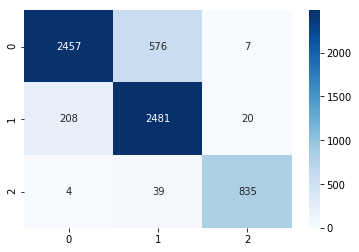

In [12]:
sns.heatmap(confmats[0], cmap="Blues", annot=True, fmt="d")

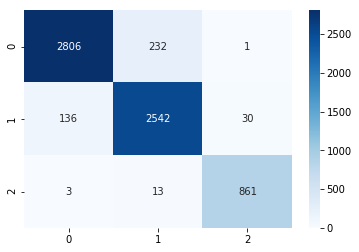

In [10]:
sns.heatmap(confmats[4], cmap="Blues", annot=True, fmt="d")

In [7]:
#抱存數據
import pickle
#保存Model(注:save文件夹要预先建立，否则会报错)
with open('save/svm_model_1_0.pickle', 'wb') as f:
    pickle.dump(svm_model, f)



###  套入測試資料並以指標評估

In [13]:
#testing
from sklearn.metrics import accuracy_score
X = X_test
y = y_test       
X_preprocess = test_preprocess(X)
y_pred = model.predict(X_preprocess) 
accuracy = accuracy_score(y, y_pred)  # 準確度 =  分類成功的樣本數 / 總樣本數
#accuracy = svm_model.score(X_preprocess, y)  #不用scikit learn的模型分數來做  ，結果同上哈哈哈
print("accuracy : {:f}".format(accuracy))

accuracy : 0.882369


In [14]:
from sklearn.metrics import classification_report
target_names = ['Success', 'Fail', 'Background']
print("d=1 ; theta = 0 的分類狀況:")
print()
print(classification_report(y, y_pred, target_names=target_names))

d=1 ; theta = 0 的分類狀況:

              precision    recall  f1-score   support

     Success       0.95      0.93      0.94      1656
        Fail       0.92      0.94      0.93      1554
  Background       0.97      0.96      0.96       471

   micro avg       0.94      0.94      0.94      3681
   macro avg       0.95      0.94      0.94      3681
weighted avg       0.94      0.94      0.94      3681



### micro : 通过先计算总体的TP，FN和FP的数量，再计算F1
### macro :分布计算每个类别的F1，然后做平均（各类别F1的权重相同）
### 本實驗分類無乘上權重 故可以不用裡weighted

##  劃出ROC曲線

In [16]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

Features = csv_data.drop('label',axis=1)             
Label = csv_data['label']
Label = label_binarize(Label, classes=[0, 1, 2]) #將標籤二值化
n_classes = Label.shape[1]    #設置種類

X_train, X_test, y_train, y_test = train_test_split(Features.values, Label, test_size=0.1, random_state=0) #分割1成測試就好

n_samples, n_features = X.shape

# Learn to predict each class against the other
classifier = OneVsRestClassifier(SVC(C = 300 ,kernel = 'rbf' ,random_state=42 ,decision_function_shape = 'ovr',gamma = 0.01))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [17]:
# 计算每一类的ROC
from sklearn.metrics import roc_curve, auc
from scipy import interp
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


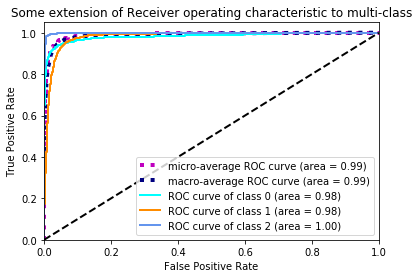

In [20]:
import matplotlib.pyplot as plt
from itertools import cycle
lw = 2 #線的粗細
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='m', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('d=1 ; theta =0')
plt.legend(loc="lower right")
plt.show()